### Lattice Surgery Schedule

In [3]:
from benchmarks.cirq_to_ls import cirq_to_ls
from swiper.simulator import DecodingSimulator
import matplotlib.pyplot as plt
import swiper.plot as plotter
import subprocess
from benchmarks.benchmark_circuits import CarlemanEncoding, ElectronicStructure, QROM_15
import pickle as pkl

In [ ]:
structure = ElectronicStructure()
pkl.dump(structure.get_schedule(), open('../benchmarks/cached_schedules/electronic_structure.pkl', 'wb'))

In [3]:
encoding = CarlemanEncoding()
pkl.dump(encoding.get_schedule(), open('../benchmarks/cached_schedules/carleman_encoding.pkl', 'wb'))

LS Instructions read  7280
Slices 906
Made patch computation. Took 2.80558s.


In [4]:
qrom15 = QROM_15()
pkl.dump(qrom15.get_schedule(), open('../benchmarks/cached_schedules/qrom_15.pkl', 'wb'))

LS Instructions read  816
Slices 137
Made patch computation. Took 0.304241s.


In [5]:
ls_schedule = encoding.get_schedule()

In [6]:
d=7
decoding_time = 0
speculation_time = 0
speculation_accuracy = 1

simulator = DecodingSimulator(d, lambda _: decoding_time, speculation_time, speculation_accuracy, speculation_mode='integrated')

In [7]:
#%%prun
success, device_data, window_data, decoding_data = simulator.run(
    schedule=ls_schedule,
    scheduling_method='sliding',
    max_parallel_processes=None,
    progress_bar=True,
    save_animation_frames=False
)

Surface code rounds: 5263it [02:20, 37.53it/s]


<Axes3D: >

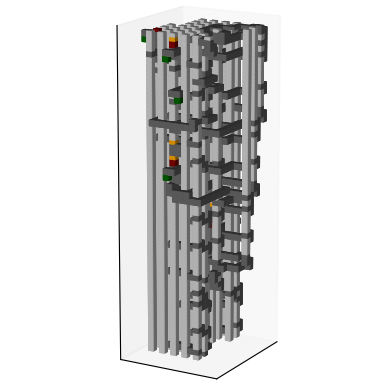

In [8]:
plotter.plot_device_schedule_trace(device_data, hide_z_ticks=True, z_min=200, z_max=600)